# K-Means

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\asus\Desktop\K-means.csv')
print(data)



     feeder COB               DFB  DOFDB      EENS
0         A   A  1398/01/01 06:54      5  0.010946
1         B   B  1398/01/01 07:15      2  0.003127
2         C   C  1398/01/01 12:03     42  0.016419
3         D   D  1398/01/02 01:20     65  0.039093
4         A   E  1398/01/02 16:26     24  0.075059
...     ...  ..               ...    ...       ...
1644      G   F  1398/12/29 10:21      9  0.017201
1645      C   I  1398/12/29 13:23     52  0.025020
1646      E   R  1398/12/29 18:28     39  0.193120
1647      C   X  1398/12/29 19:08      2  0.006255
1648      H   D  1398/12/29 22:20      6  0.013292

[1649 rows x 5 columns]


In [3]:
data["feeder"] = data["feeder"].astype('category')
data.dtypes
data["COB"] = data["COB"].astype('category')

data["feeder"] = data["feeder"].cat.codes
data["COB"] = data["COB"].cat.codes
data.head()

,feeder,COB,DFB,DOFDB,EENS
0,0,0,1398/01/01 06:54,5,0.010946
1,1,2,1398/01/01 07:15,2,0.003127
2,2,4,1398/01/01 12:03,42,0.016419
3,3,6,1398/01/02 01:20,65,0.039093
4,0,8,1398/01/02 16:26,24,0.075059


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


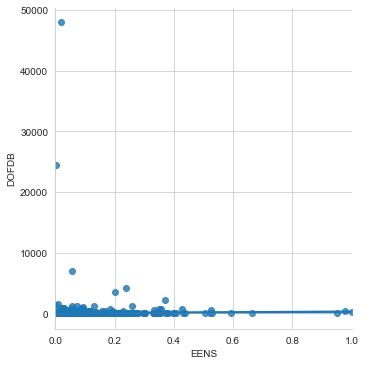

In [4]:
X= data[['COB','EENS','DOFDB']]
y=data['feeder']

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.lmplot('EENS', 'DOFDB', data=data)

In [5]:

from sklearn.cluster import KMeans


kmeans= KMeans(n_clusters= 4)
kmeans.fit(X)

kmeans.cluster_centers_

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['feeder'],kmeans.labels_))
print(classification_report(data['feeder'],kmeans.labels_))



[[188   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 54   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [176   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [191   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 99   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [139   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [128   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [123   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [191   1   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [116   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 54   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
